In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [ ]:
pip install tensorflow

In [ ]:
print(os.listdir("/content/sample_data/input"))

['urldata.csv', 'untitled']


In [ ]:
urldata = pd.read_csv("/content/sample_data/input/urldata.csv")

In [ ]:
urldata.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [ ]:
# Remove the column "un-named"
urldata = urldata.drop('Unnamed: 0', axis=1)

In [ ]:
urldata.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [ ]:
urldata.shape

(450176, 3)

In [ ]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     450176 non-null  object
 1   label   450176 non-null  object
 2   result  450176 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 10.3+ MB


In [ ]:
#check missing value
urldata.isnull().sum()

url       0
label     0
result    0
dtype: int64

# Data Preprocessing
*   Length Feature
*   Count Feature
*   Binary Feature

In [ ]:
pip install tld

In [ ]:
#import dependencies
from urllib.parse import urlparse
from tld import get_tld
import os.path

In [ ]:
#length of url
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))

In [ ]:
#hostname length; www.google.com=14; netloc=network location
urldata['hostname_length']=urldata['url'].apply(lambda i: len(urlparse(i).netloc))

In [ ]:
#Path Length; count till last after hostname; say www.google.com/{path_name}
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))

In [ ]:
#First Directory Length; say www.google.com/{first_directory}/
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

urldata['fd_length'] = urldata['url'].apply(lambda i: fd_length(i))

In [ ]:
#Length of Top Level Domain
urldata['tld'] = urldata['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

urldata['tld_length'] = urldata['tld'].apply(lambda i: tld_length(i))

In [ ]:
urldata.head(10)

,url,label,result,url_length,hostname_length,path_length,fd_length,tld,tld_length
0,https://www.google.com,benign,0,22,14,0,0,com,3
1,https://www.youtube.com,benign,0,23,15,0,0,com,3
2,https://www.facebook.com,benign,0,24,16,0,0,com,3
3,https://www.baidu.com,benign,0,21,13,0,0,com,3
4,https://www.wikipedia.org,benign,0,25,17,0,0,org,3
5,https://www.reddit.com,benign,0,22,14,0,0,com,3
6,https://www.yahoo.com,benign,0,21,13,0,0,com,3
7,https://www.google.co.in,benign,0,24,16,0,0,co.in,5
8,https://www.qq.com,benign,0,18,10,0,0,com,3
9,https://www.amazon.com,benign,0,22,14,0,0,com,3


# Count Features

In [ ]:
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))

In [ ]:
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))

In [ ]:
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))

In [ ]:
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))

In [ ]:
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))

In [ ]:
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))

In [ ]:
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))

In [ ]:
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))

In [ ]:
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

In [ ]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

In [ ]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))

In [ ]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))

# Binary Feature

In [ ]:
import re

In [ ]:
#Using ip address or not in any domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
urldata['use_of_ip'] = urldata['url'].apply(lambda i: having_ip_address(i))

In [ ]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
urldata['short_url'] = urldata['url'].apply(lambda i: shortening_service(i))

In [ ]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld,tld_length,count-,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0,22,14,0,0,com,3,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0,23,15,0,0,com,3,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,24,16,0,0,com,3,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0,21,13,0,0,com,3,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,org,3,0,...,2,0,1,1,1,0,20,0,1,1


# Data Visualization

<Axes: >

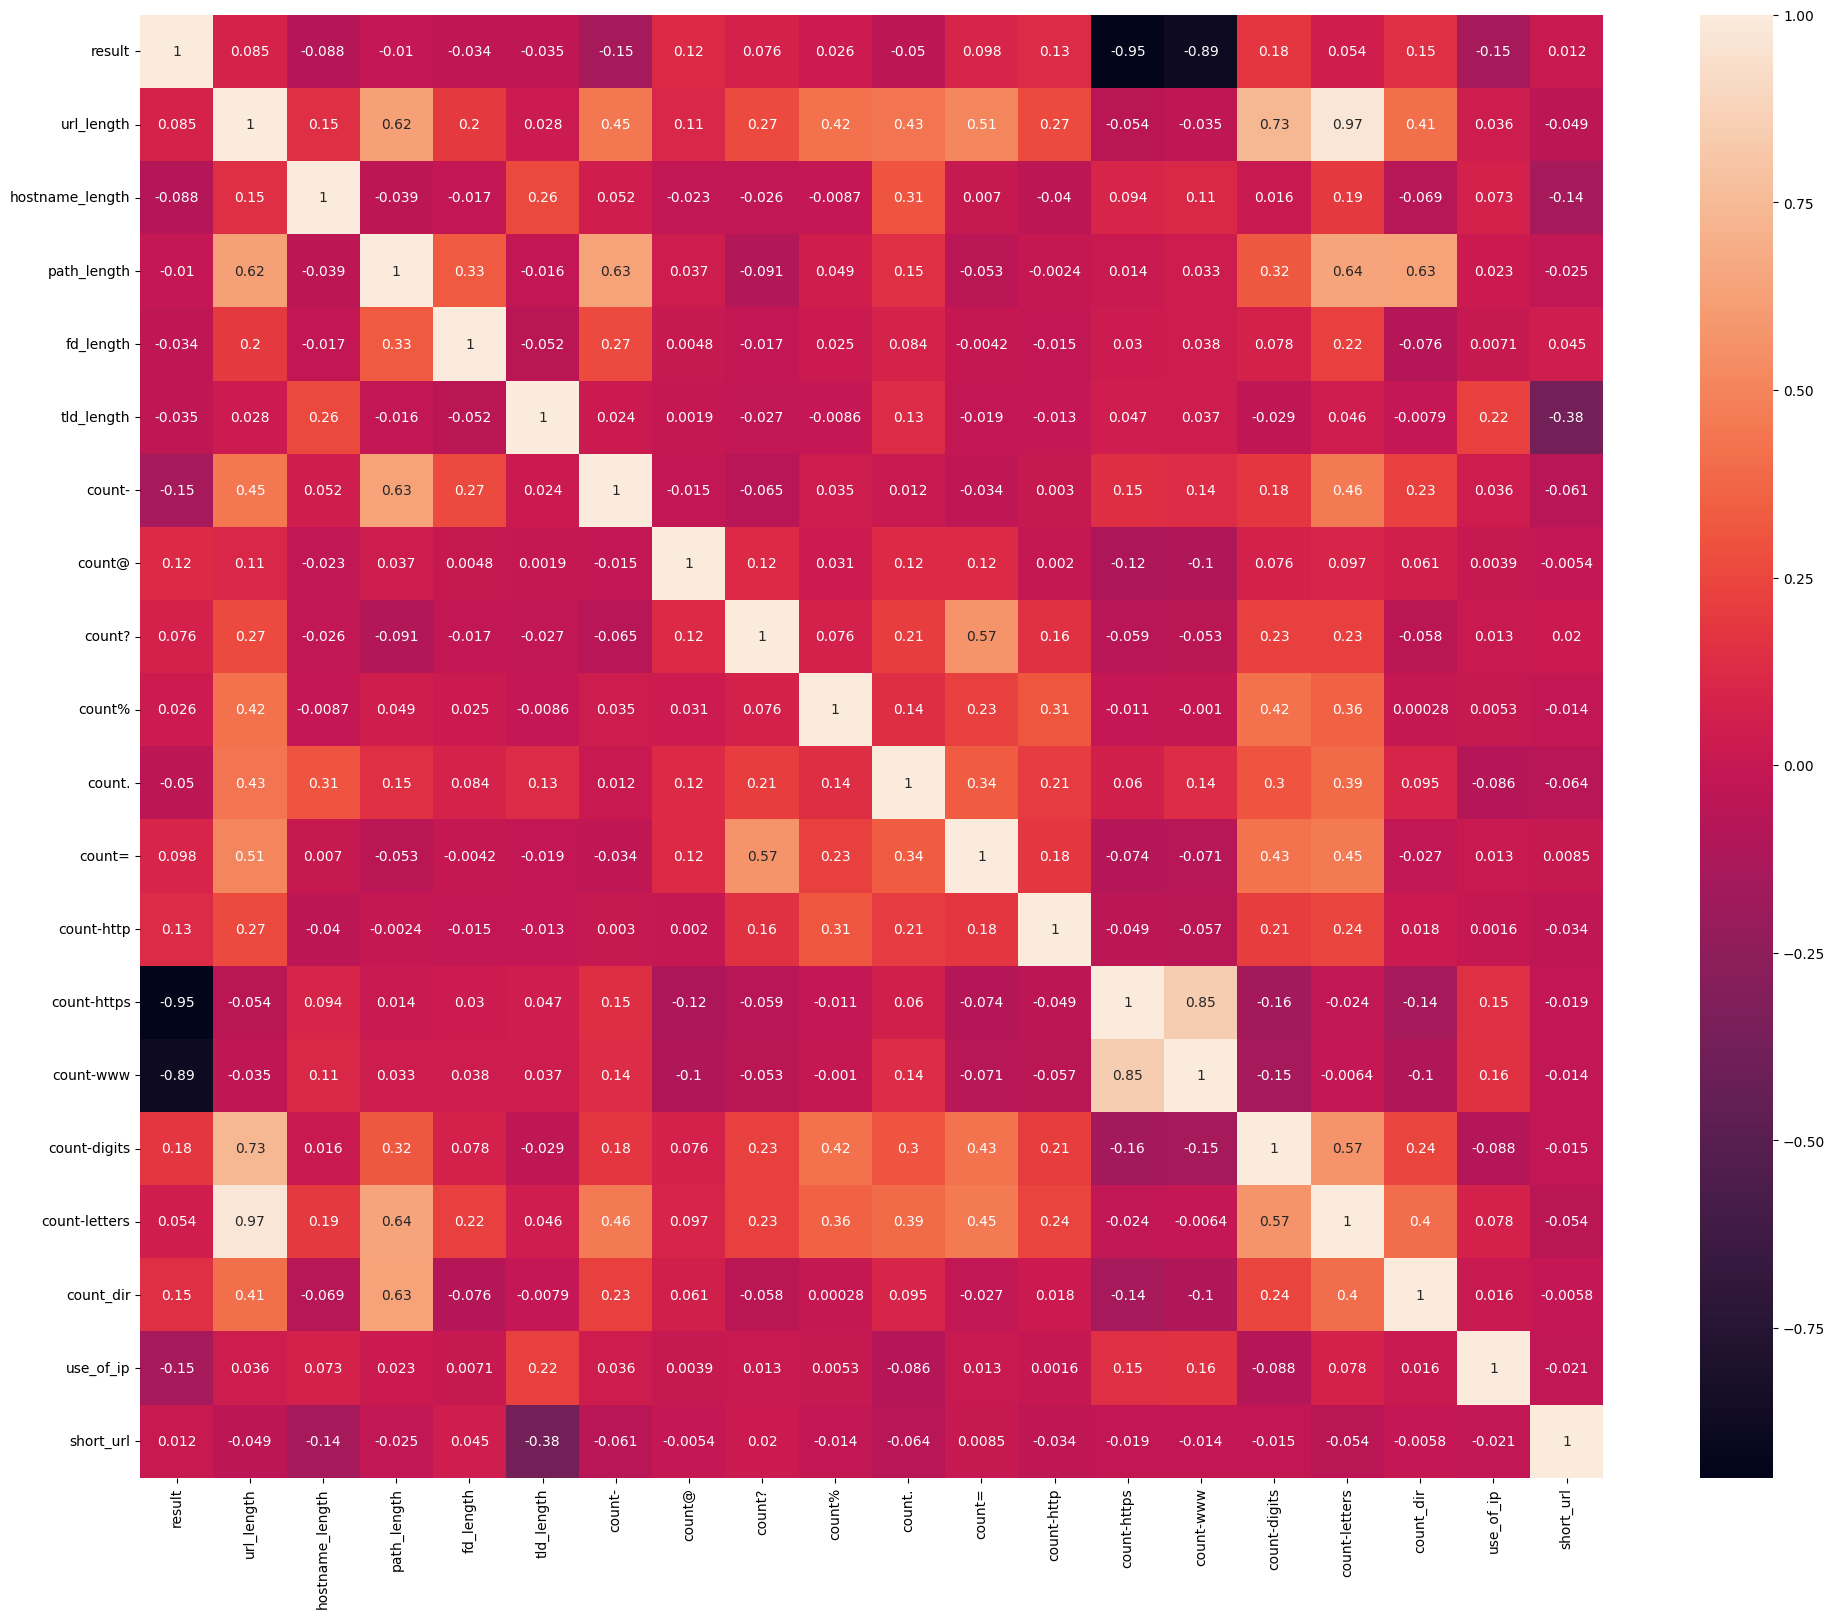

In [ ]:
# Heatmap
# Select only numeric columns from urldata
numeric_data = urldata.select_dtypes(include=['float64', 'int64']) #newline
corrmat = numeric_data.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

<ipython-input-38-1600816b6069>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=urldata, palette=colors)


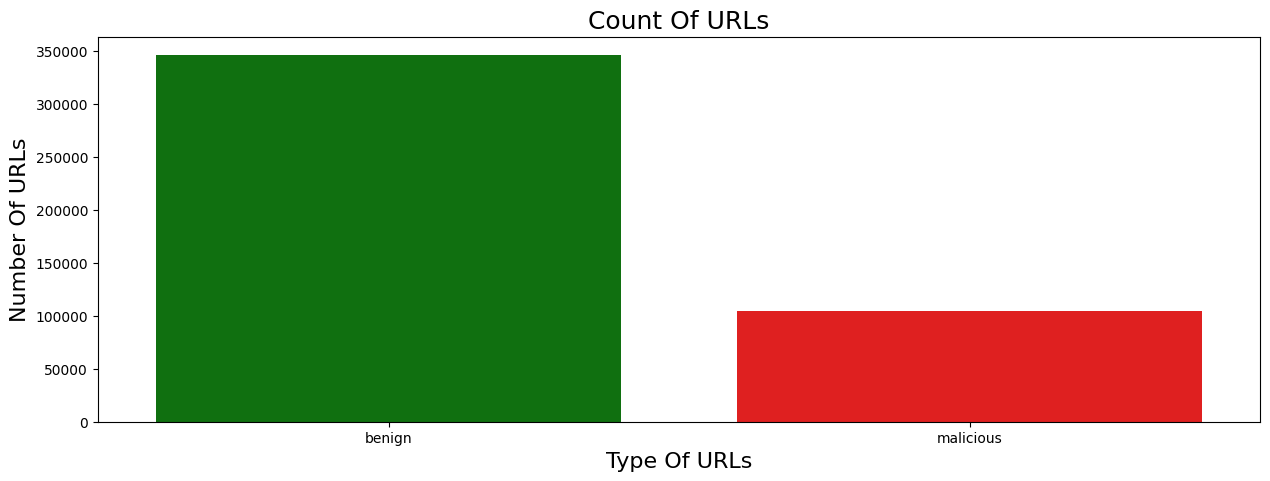

In [ ]:
# Define the colors for benign and malicious URLs
colors = {'benign': 'green', 'malicious': 'red'}

plt.figure(figsize=(15, 5))
sns.countplot(x='label', data=urldata, palette=colors)
plt.title("Count Of URLs", fontsize=18)
plt.xlabel("Type Of URLs", fontsize=16)
plt.ylabel("Number Of URLs", fontsize=16)

# Show the plot
plt.show()

In [ ]:
print("Percent Of Malicious URLs:{:.2f} %".format(len(urldata[urldata['label']=='malicious'])/len(urldata['label'])*100))
print("Percent Of Benign URLs:{:.2f} %".format(len(urldata[urldata['label']=='benign'])/len(urldata['label'])*100))

Percent Of Malicious URLs:23.20 %
Percent Of Benign URLs:76.80 %


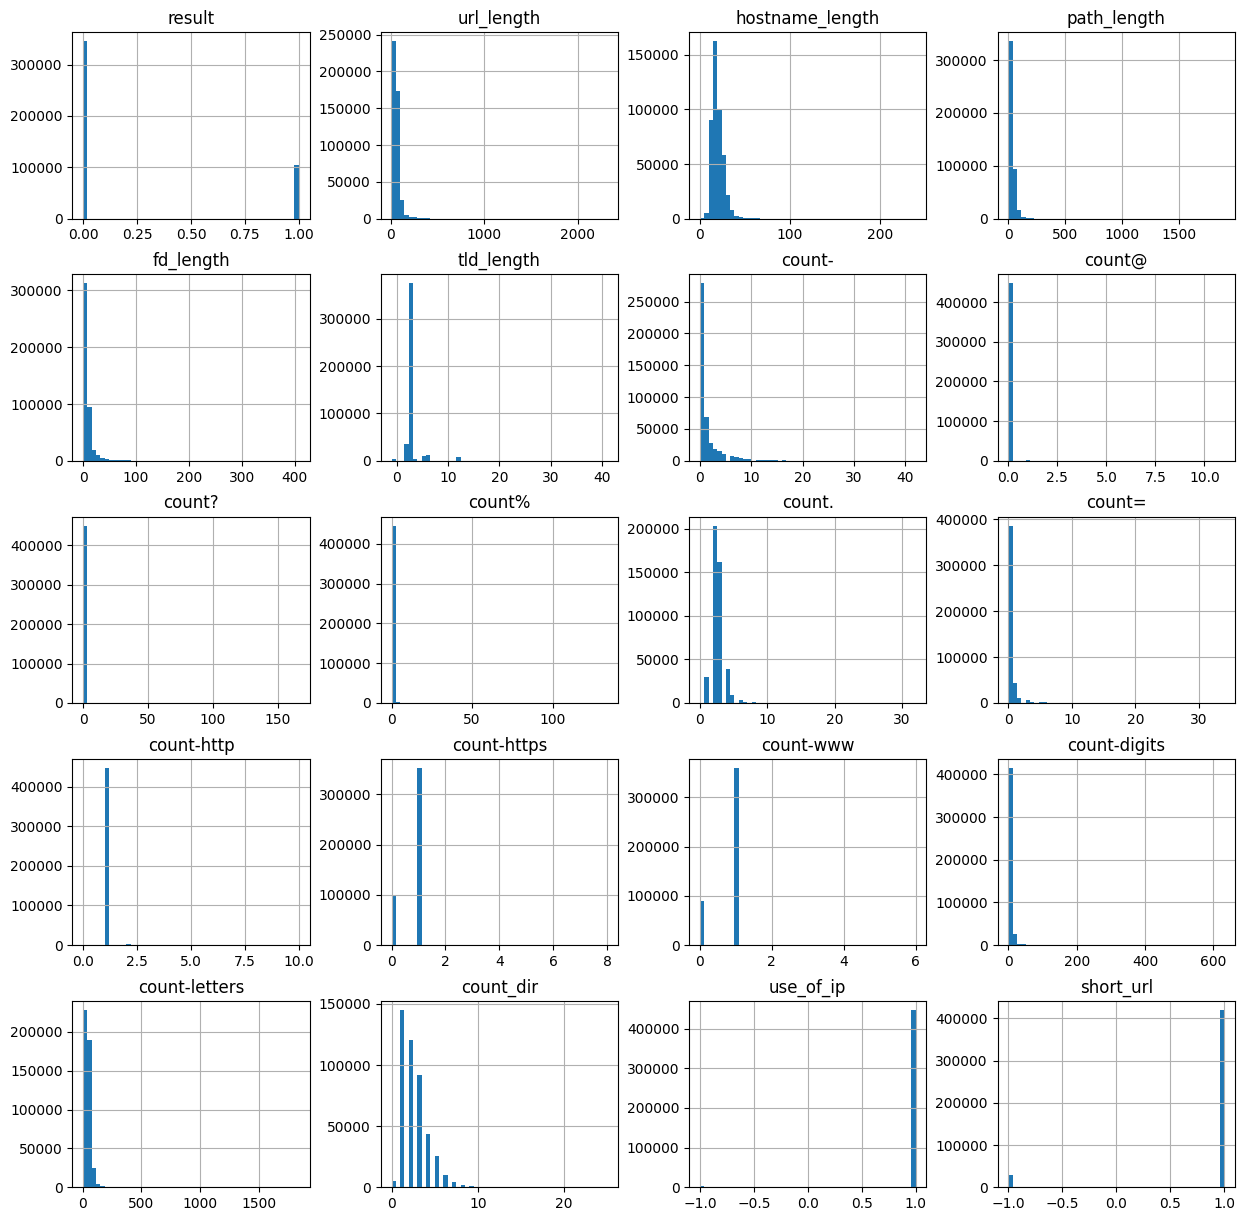

In [ ]:
urldata.hist(bins = 50,figsize = (15,15))
plt.show()

# Building Models

In [ ]:
urldata.head(22)

,url,label,result,url_length,hostname_length,path_length,fd_length,tld,tld_length,count-,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0,22,14,0,0,com,3,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0,23,15,0,0,com,3,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,24,16,0,0,com,3,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0,21,13,0,0,com,3,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,org,3,0,...,2,0,1,1,1,0,20,0,1,1
5,https://www.reddit.com,benign,0,22,14,0,0,com,3,0,...,2,0,1,1,1,0,17,0,1,-1
6,https://www.yahoo.com,benign,0,21,13,0,0,com,3,0,...,2,0,1,1,1,0,16,0,1,1
7,https://www.google.co.in,benign,0,24,16,0,0,co.in,5,0,...,3,0,1,1,1,0,18,0,1,1
8,https://www.qq.com,benign,0,18,10,0,0,com,3,0,...,2,0,1,1,1,0,13,0,1,1
9,https://www.amazon.com,benign,0,22,14,0,0,com,3,0,...,2,0,1,1,1,0,17,0,1,1


In [ ]:
urldata = urldata.drop('tld', axis=1)

In [ ]:
urldata.head(22)

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0,22,14,0,0,3,0,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0,23,15,0,0,3,0,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,24,16,0,0,3,0,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0,21,13,0,0,3,0,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,3,0,0,...,2,0,1,1,1,0,20,0,1,1
5,https://www.reddit.com,benign,0,22,14,0,0,3,0,0,...,2,0,1,1,1,0,17,0,1,-1
6,https://www.yahoo.com,benign,0,21,13,0,0,3,0,0,...,2,0,1,1,1,0,16,0,1,1
7,https://www.google.co.in,benign,0,24,16,0,0,5,0,0,...,3,0,1,1,1,0,18,0,1,1
8,https://www.qq.com,benign,0,18,10,0,0,3,0,0,...,2,0,1,1,1,0,13,0,1,1
9,https://www.amazon.com,benign,0,22,14,0,0,3,0,0,...,2,0,1,1,1,0,17,0,1,1


# Machine Learning Models & Training

Shallow Learning Models:
*   Decision Tree
*   Random Forest
*   KNN


Deep Learning Models:
*   Multilayer Perceptrons
*   Autoencoder Neural Network
*   XGBoost

In [ ]:
# Initialize lists to store results
ML_Model = []
acc_train = []
acc_test = []
dataset_size = []
execution_time = []

# Function to call for storing the results
def storeResults(model, a, b, s, t):
    ML_Model.append(model)
    acc_train.append(round(a, 3))
    acc_test.append(round(b, 3))
    dataset_size.append(s)
    execution_time.append(round(t, 2))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the sizes of the subsets
dataset_sizes = [50000, 200000, len(urldata)]

# Train and evaluate Decision Tree for each dataset size
for size in dataset_sizes:
    print(f"* Training and evaluating Decision Tree for subset size: {size}")

    # Get the subset of data
    subset = urldata.sample(n=size, random_state=12)

    # Split data into features and target
    X = subset[['hostname_length', 'path_length', 'fd_length', 'tld_length', 'count-',
                'count@', 'count?', 'count%', 'count.', 'count=', 'count-http',
                'count-https', 'count-www', 'count-digits', 'count-letters',
                'count_dir', 'use_of_ip']]
    y = subset['result']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

    # Initialize Decision Tree model
    tree = DecisionTreeClassifier(max_depth=2)

    # Train the model and measure execution time
    start_time = time.time()
    tree.fit(X_train, y_train)
    end_time = time.time() - start_time

    # Predict on training and testing set
    y_train_tree = tree.predict(X_train)
    y_test_tree = tree.predict(X_test)

    # Compute accuracy
    acc_train_tree = accuracy_score(y_train, y_train_tree)
    acc_test_tree = accuracy_score(y_test, y_test_tree)

    # Store the results
    storeResults('Decision Tree', acc_train_tree, acc_test_tree, size, end_time)

    # Print performance metrics
    print(f"Train Accuracy: {acc_train_tree * 100:.2f}%, Test Accuracy: {acc_test_tree * 100:.2f}%, Execution Time: {end_time:.2f} seconds")

    # Print confusion matrix
    print("Confusion matrix:" "\n", confusion_matrix(y_test, y_test_tree))


    # Plot feature importance
    # plt.figure(figsize=(7, 5))  # Reduced figure size
    # n_features = X_train.shape[1]
    # plt.barh(range(n_features), tree.feature_importances_, align='center')
    # plt.yticks(np.arange(n_features), X_train.columns)
    # plt.xlabel("Feature Importance")
    # plt.ylabel("Feature")
    # plt.title("Decision Tree Feature Importance")
    # plt.tight_layout()  # Adjust layout to prevent clipping
    # plt.show()

    print('-' * 50)

* Training and evaluating Decision Tree for subset size: 50000
Train Accuracy: 99.58%, Test Accuracy: 99.41%, Execution Time: 0.03 seconds
Confusion matrix:
 [[7702   20]
 [  39 2239]]
--------------------------------------------------
* Training and evaluating Decision Tree for subset size: 200000
Train Accuracy: 99.54%, Test Accuracy: 99.62%, Execution Time: 0.17 seconds
Confusion matrix:
 [[30682    58]
 [   92  9168]]
--------------------------------------------------
* Training and evaluating Decision Tree for subset size: 450176
Train Accuracy: 99.55%, Test Accuracy: 99.55%, Execution Time: 0.35 seconds
Confusion matrix:
 [[68947   125]
 [  284 20680]]
--------------------------------------------------


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the sizes of the subsets
dataset_sizes = [50000, 200000, len(urldata)]

# Train and evaluate Random Forest for each dataset size
for size in dataset_sizes:
    print(f"* Training and evaluating Random Forest for subset size: {size}")

    # Get the subset of data
    subset = urldata.sample(n=size, random_state=12)

    # Split data into features and target
    X = subset[['hostname_length', 'path_length', 'fd_length', 'tld_length', 'count-',
                'count@', 'count?', 'count%', 'count.', 'count=', 'count-http',
                'count-https', 'count-www', 'count-digits', 'count-letters',
                'count_dir', 'use_of_ip']]
    y = subset['result']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

    # Initialize Random Forest model
    forest = RandomForestClassifier(n_estimators=10, max_depth=2)

    # Train the model and measure execution time
    start_time = time.time()
    forest.fit(X_train, y_train)
    end_time = time.time() - start_time

    # Predict on training and testing set
    y_train_forest = forest.predict(X_train)
    y_test_forest = forest.predict(X_test)

    # Compute accuracy
    acc_train_forest = accuracy_score(y_train, y_train_forest)
    acc_test_forest = accuracy_score(y_test, y_test_forest)

    # Store the results
    storeResults('Random Forest', acc_train_forest, acc_test_forest, size, end_time)

    # Print performance metrics
    print(f"Train Accuracy: {acc_train_forest * 100:.2f}%, Test Accuracy: {acc_test_forest * 100:.2f}%, Execution Time: {end_time:.2f} seconds")

    # Print confusion matrix
    print("Confusion matrix:" "\n", confusion_matrix(y_test, y_test_forest))

    print('-' * 50)


* Training and evaluating Random Forest for subset size: 50000
Train Accuracy: 96.42%, Test Accuracy: 96.39%, Execution Time: 0.12 seconds
Confusion matrix:
 [[7702   20]
 [ 341 1937]]
--------------------------------------------------
* Training and evaluating Random Forest for subset size: 200000
Train Accuracy: 95.76%, Test Accuracy: 95.86%, Execution Time: 0.47 seconds
Confusion matrix:
 [[30717    23]
 [ 1631  7629]]
--------------------------------------------------
* Training and evaluating Random Forest for subset size: 450176
Train Accuracy: 96.52%, Test Accuracy: 96.52%, Execution Time: 1.19 seconds
Confusion matrix:
 [[69024    48]
 [ 3085 17879]]
--------------------------------------------------


## MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

# Define the sizes of the subsets
dataset_sizes = [10000, 50000, 100000]

# Train and evaluate MLP for each dataset size
for size in dataset_sizes:
    print(f"* Training and evaluating MLP for subset size: {size}")

    # Get the subset of data
    subset = urldata.sample(n=size, random_state=12)

    # Split data into features and target
    X = subset[['hostname_length', 'path_length', 'fd_length', 'tld_length', 'count-',
                'count@', 'count?', 'count%', 'count.', 'count=', 'count-http',
                'count-https', 'count-www', 'count-digits', 'count-letters',
                'count_dir', 'use_of_ip']]
    y = subset['result']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

    # Initialize MLP model
    mlp = MLPClassifier(hidden_layer_sizes=[50, 50, 50], max_iter=100, alpha=0.001)

    # Train the model and measure execution time
    start_time = time.time()
    mlp.fit(X_train, y_train)
    end_time = time.time() - start_time

    # Predict on training and testing set
    y_train_mlp = mlp.predict(X_train)
    y_test_mlp = mlp.predict(X_test)

    # Compute accuracy
    acc_train_mlp = accuracy_score(y_train, y_train_mlp)
    acc_test_mlp = accuracy_score(y_test, y_test_mlp)

    # Store the results
    storeResults('MLP', acc_train_mlp, acc_test_mlp, size, end_time)

    # Print performance metrics
    print(f"Train Accuracy: {acc_train_mlp * 100:.2f}%, Test Accuracy: {acc_test_mlp * 100:.2f}%, Execution Time: {end_time:.2f} seconds")
    # Print confusion matrix
    print("Confusion matrix:" "\n", confusion_matrix(y_test, y_test_mlp))

    print('-' * 50)


* Training and evaluating MLP for subset size: 50000
Train Accuracy: 99.48%, Test Accuracy: 99.34%, Execution Time: 36.20 seconds
Confusion matrix:
 [[7713    9]
 [  57 2221]]
--------------------------------------------------
* Training and evaluating MLP for subset size: 200000


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Train Accuracy: 99.70%, Test Accuracy: 99.73%, Execution Time: 191.85 seconds
Confusion matrix:
 [[30694    46]
 [   62  9198]]
--------------------------------------------------
* Training and evaluating MLP for subset size: 450176


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Train Accuracy: 99.64%, Test Accuracy: 99.61%, Execution Time: 17.78 seconds
Confusion matrix:
 [[69002    70]
 [  280 20684]]
--------------------------------------------------


In [ ]:
import xgboost as xgb

# Define the sizes of the subsets
dataset_sizes = [50000, 200000, len(urldata)]

# Train and evaluate XGBoost for each dataset size
for size in dataset_sizes:
    print(f"* Training and evaluating XGBoost for subset size: {size}")

    # Get the subset of data
    subset = urldata.sample(n=size, random_state=12)

    # Split data into features and target
    X = subset[['hostname_length', 'path_length', 'fd_length', 'tld_length', 'count-',
                'count@', 'count?', 'count%', 'count.', 'count=', 'count-http',
                'count-https', 'count-www', 'count-digits', 'count-letters',
                'count_dir', 'use_of_ip']]
    y = subset['result']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

    # Initialize XGBoost model
    xgb_model = xgb.XGBClassifier(max_depth=3, reg_alpha=1, reg_lambda=1, learning_rate=0.004, random_state=10)

    # Train the model and measure execution time
    start_time = time.time()
    xgb_model.fit(X_train, y_train)
    end_time = time.time() - start_time

    # Predict on training and testing set
    y_train_xgb = xgb_model.predict(X_train)
    y_test_xgb = xgb_model.predict(X_test)

    # Compute accuracy
    acc_train_xgb = accuracy_score(y_train, y_train_xgb)
    acc_test_xgb = accuracy_score(y_test, y_test_xgb)

    # Store the results
    storeResults('XGBoost', acc_train_xgb, acc_test_xgb, size, end_time)

    # Print performance metrics
    print(f"Train Accuracy: {acc_train_xgb * 100:.2f}%, Test Accuracy: {acc_test_xgb * 100:.2f}%, Execution Time: {end_time:.2f} seconds")

    # Print confusion matrix
    print("Confusion matrix:" "\n", confusion_matrix(y_test, y_test_xgb))
    print('-' * 50)


* Training and evaluating XGBoost for subset size: 50000
Train Accuracy: 98.34%, Test Accuracy: 98.15%, Execution Time: 1.05 seconds
Confusion matrix:
 [[7722    0]
 [ 185 2093]]
--------------------------------------------------
* Training and evaluating XGBoost for subset size: 200000
Train Accuracy: 98.35%, Test Accuracy: 98.48%, Execution Time: 2.42 seconds
Confusion matrix:
 [[30740     0]
 [  609  8651]]
--------------------------------------------------
* Training and evaluating XGBoost for subset size: 450176
Train Accuracy: 98.39%, Test Accuracy: 98.34%, Execution Time: 2.37 seconds
Confusion matrix:
 [[69071     1]
 [ 1498 19466]]
--------------------------------------------------


## Autoencoder Neural Network

In [ ]:
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import Input, Dense

# Define the sizes of the subsets
dataset_sizes = [10000, 50000, 100000]

# Train and evaluate Autoencoder for each dataset size
for size in dataset_sizes:
    print(f"* Training and evaluating Autoencoder for subset size: {size}")

    # Get the subset of data
    subset = urldata.sample(n=size, random_state=12)

    # Split data into features and target
    X = subset[['hostname_length', 'path_length', 'fd_length', 'tld_length', 'count-',
                'count@', 'count?', 'count%', 'count.', 'count=', 'count-http',
                'count-https', 'count-www', 'count-digits', 'count-letters',
                'count_dir', 'use_of_ip']]
    y = subset['result']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

    # Add noise to input data
    noise_factor = 0.5
    X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
    X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

    # Define the autoencoder architecture
    input_layer = Input(shape=(X_train.shape[1],))
    encoded = Dense(128, activation='relu')(input_layer)
    encoded = Dense(64, activation='relu')(encoded)
    decoded = Dense(128, activation='relu')(encoded)
    output_layer = Dense(X_train.shape[1], activation='sigmoid')(decoded)

    autoencoder = Model(input_layer, output_layer)

    # Compile the autoencoder
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    # Train the autoencoder
    autoencoder.fit(X_train_noisy, X_train, epochs=10, batch_size=64, shuffle=True, validation_data=(X_test_noisy, X_test))

    # Use encoder part for classification
    encoder = Model(input_layer, encoded)

    encoded_train = encoder.predict(X_train)
    encoded_test = encoder.predict(X_test)

    # Use a simple dense layer for classification on top of encoded features
    classifier = tf.keras.Sequential([
        Dense(64, activation='relu', input_shape=(64,)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile and train the classifier
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    classifier.fit(encoded_train, y_train, epochs=5, batch_size=1024, validation_split=0.2, validation_data=(encoded_test, y_test))

    # Predict on training and testing set
    y_train_pred = classifier.predict(encoded_train)
    y_test_pred = classifier.predict(encoded_test)

    y_train_pred = np.round(y_train_pred).flatten()
    y_test_pred = np.round(y_test_pred).flatten()

    # Compute accuracy
    acc_train_autoencoder = accuracy_score(y_train, y_train_pred)
    acc_test_autoencoder = accuracy_score(y_test, y_test_pred)

    # Store the results
    storeResults('Autoencoder', acc_train_autoencoder, acc_test_autoencoder, size, 0)  # Note: Execution time is not calculated here

    # Print performance metrics
    print(f"Train Accuracy: {acc_train_autoencoder * 100:.2f}%, Test Accuracy: {acc_test_autoencoder * 100:.2f}%")
    # Print confusion matrix
    print("Confusion matrix:" "\n", confusion_matrix(y_test, y_test_pred))

    print('-' * 50)


* Training and evaluating Autoencoder for subset size: 10000
Epoch 1/10
125/125 [==============================] - 2s 5ms/step - loss: 264.2182 - val_loss: 275.2260
Epoch 2/10
125/125 [==============================] - 0s 3ms/step - loss: 264.0254 - val_loss: 275.1957
Epoch 3/10
125/125 [==============================] - 0s 4ms/step - loss: 264.0105 - val_loss: 275.1838
Epoch 4/10
125/125 [==============================] - 1s 5ms/step - loss: 263.9997 - val_loss: 275.1767
Epoch 5/10
125/125 [==============================] - 1s 8ms/step - loss: 263.9916 - val_loss: 275.1668
Epoch 6/10
125/125 [==============================] - 1s 4ms/step - loss: 263.9722 - val_loss: 275.1498
Epoch 7/10
125/125 [==============================] - 1s 7ms/step - loss: 263.9660 - val_loss: 275.1458
Epoch 8/10
125/125 [==============================] - 1s 8ms/step - loss: 263.9646 - val_loss: 275.1440
Epoch 9/10
125/125 [==============================] - 1s 7ms/step - loss: 263.9635 - val_loss: 275.1453
Epo

## K Nearest Neighbour KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define the sizes of the subsets
dataset_sizes = [10000, 50000, 100000]

# Train and evaluate KNN for each dataset size
for size in dataset_sizes:
    print(f"* Training and evaluating KNN for subset size: {size}")

    # Get the subset of data
    subset = urldata.sample(n=size, random_state=12)

    # Split data into features and target
    X = subset[['hostname_length', 'path_length', 'fd_length', 'tld_length', 'count-',
                'count@', 'count?', 'count%', 'count.', 'count=', 'count-http',
                'count-https', 'count-www', 'count-digits', 'count-letters',
                'count_dir', 'use_of_ip']]
    y = subset['result']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

    # Initialize KNN model
    knn = KNeighborsClassifier(n_neighbors=3)

    # Train the model and measure execution time
    start_time = time.time()
    knn.fit(X_train, y_train)
    end_time = time.time() - start_time

    # Predict on training and testing set
    y_train_knn = knn.predict(X_train)
    y_test_knn = knn.predict(X_test)

    # Compute accuracy
    acc_train_knn = accuracy_score(y_train, y_train_knn)
    acc_test_knn = accuracy_score(y_test, y_test_knn)

    # Store the results
    storeResults('KNN', acc_train_knn, acc_test_knn, size, end_time)

    # Print performance metrics
    print(f"Train Accuracy: {acc_train_knn * 100:.2f}%, Test Accuracy: {acc_test_knn * 100:.2f}%, Execution Time: {end_time:.2f} seconds")
    # Print confusion matrix
    print("Confusion matrix:" "\n", confusion_matrix(y_test, y_test_knn))

    print('-' * 50)


* Training and evaluating KNN for subset size: 10000
Train Accuracy: 93.16%, Test Accuracy: 87.60%, Execution Time: 0.00 seconds
Confusion matrix:
 [[1487   58]
 [ 190  265]]
--------------------------------------------------
* Training and evaluating KNN for subset size: 50000
Train Accuracy: 95.91%, Test Accuracy: 92.25%, Execution Time: 0.01 seconds
Confusion matrix:
 [[7519  203]
 [ 572 1706]]
--------------------------------------------------
* Training and evaluating KNN for subset size: 100000
Train Accuracy: 96.68%, Test Accuracy: 93.91%, Execution Time: 0.02 seconds
Confusion matrix:
 [[15126   274]
 [  944  3656]]
--------------------------------------------------


In [ ]:
import pandas as pd

# Assuming ML_Model, acc_train, acc_test, and dataset_size are already populated

# Creating a DataFrame
results = pd.DataFrame({
    'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Dataset Size': dataset_size,
    'Execution Time': execution_time,
})

# Grouping and aggregating results
# unique_results = results.groupby(['ML Model', 'Dataset Size'])

print(results)

         ML Model  Train Accuracy  Test Accuracy  Dataset Size  Execution Time
0   Decision Tree           0.996          0.994         50000            0.03
1   Decision Tree           0.995          0.996        200000            0.17
2   Decision Tree           0.996          0.995        450176            0.35
3   Random Forest           0.964          0.964         50000            0.12
4   Random Forest           0.958          0.959        200000            0.47
5   Random Forest           0.965          0.965        450176            1.19
6             MLP           0.995          0.993         50000           36.20
7             MLP           0.997          0.997        200000          191.85
8             MLP           0.996          0.996        450176           17.78
9         XGBoost           0.763          0.772         50000            0.35
10        XGBoost           0.767          0.768        200000            1.04
11        XGBoost           0.768          0.767    